<a href="https://colab.research.google.com/github/jakep3/Project-1-CTD---Jake-Philpott/blob/master/Project_1_CTD_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 #run these line of code first
import pandas as pd
import statistics 
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

# 1 Oregon Shelf Surface Piering Profiler Mooring

WINTER DATA (24 Hours)


In [0]:
url1='https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%201st%20profiler.csv'
import pandas as pd
data1 = pd.read_csv(url1)

In [0]:
#my variables
TempW1=data1['temperature'] #winter temperature


SalinityW1 = data1['salinity'] #salinity winter

PressureW1 = data1['pressure'] #winter pressure in pascals
DensityW1 = data1['density'] #winter density
gravity=9.81 #gravitational acceleration


#calculations
DepthW1 = PressureW1*10000 / (DensityW1*gravity) #depth of water winter

CW1 = 1449.2 +4.6*(TempW1)-0.055*(TempW1**2)+0.00029*(TempW1**3)+(1.34-0.01*(TempW1))*(SalinityW1-35)+0.016*(DepthW1) #speed of sound winter



Getting Number of Dives 

In [238]:
y1 = DepthW1.values #my depth values in the form of an array
x1 = CW1.values #my speed of sound values in the form of an array

dives1 = 1 #doing this because there is always at least 1 dive so need to establish that as the base.
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 1:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


2

Making Speed of Sound Profiler and including the average ssp

In [239]:
#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))

maxssp1 #gives max ssp value for this set of data

[1492.8775076523955, 1492.9027931513945]

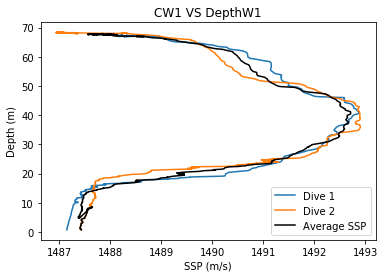

In [240]:
q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1): #y is depth, while loop will only run while q value is less than the number of y values i have 

  x_1 = 0  #establish an x value to start
  y_1 = 0 #establish a y value to start
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg) #xvalues i will use when plotting the average curve
      avgdepL.append(y_Avg) #yvalues i will  use when plotting the average curve

      q += 1  #this keeps track of the number of y values i am at so that the while loop will stop running once q is greater than number of y values that i have. 

  else:
      break

  #now can make the plot

for i in range(0, dives1): #to plot each dive individually on one plot
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values on the same plot
plt.legend()
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW1 VS DepthW1')
plt.show()

In [0]:
#now can make the plot
#code below didnt give proper results but gave good visual reference to see progress.
#CW1Avg = statistics.mean(CW1) #this gives the average of the speed of sound for this data set.
#y1= DepthW1
#x1= CW1
#plt.scatter(x1, y1, label='CW1')
#plt.ylabel('depth (m)')
#plt.xlabel('ssp (m/s)')
#plt.title('CW1 vs DepthW1')
#plot 1 shows 2 different sets of data, so that means there was 2 dives during the 24 hours.
#plt.axhline(CW1Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()



SUMMER DATA (24 Hours)

In [0]:
url2='https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%201st%20profiler.csv'
data2 = pd.read_csv(url2)

In [0]:
#my variables
TempW2=data2['temperature'] # temperature


SalinityW2 = data2['salinity'] #salinity 

PressureW2 = data2['pressure'] # pressure in pascals
DensityW2 = data2['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW2 = PressureW2*10000 / (DensityW2*gravity) #depth of water 

CW2 = 1449.2 +4.6*(TempW2)-0.055*(TempW2**2)+0.00029*(TempW2**3)+(1.34-0.01*(TempW2))*(SalinityW2-35)+0.016*(DepthW2) #speed of sound



In [0]:
#now can make the plot
#code below didnt give proper results but gave good visual reference to see progress.
#CW2Avg = statistics.mean(CW2) #this gives the average of the speed of sound for this data set.
#y2= DepthW2
#x2= CW2
#plt.scatter(x2, y2, label='CW2')
#plt.ylabel('depth (m)')
#plt.xlabel('ssp (m/s)')
#plt.title('CW2 vs DepthW2')

#plt.axhline(CW1Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()



Find Dives and Plot Dives 

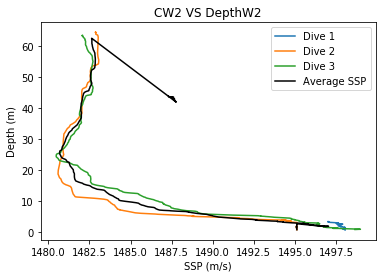

[1498.0635958139035, 1495.1493597913188, 1498.9877689575903]

In [243]:
y1 = DepthW2.values #my depth values
x1 = CW2.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+62:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend()
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW2 VS DepthW2')
plt.show()

maxssp1 #gives max ssp value for this set of data

# 2 Oregon Offshore Cabled Shallow Profiler Mooring

WINTER DATA (24 Hours)

In [0]:
url3='https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%20profiler%202.csv'
data3 = pd.read_csv(url3)

In [0]:
#my variables
TempW3=data3['seawater_temperature'] # temperature


SalinityW3 = data3['practical_salinity'] #salinity 

PressureW3 = data3['seawater_pressure'] # pressure in pascals
DensityW3 = data3['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW3 = PressureW3 *10000 / (DensityW3*gravity) #depth of water 

CW3 = 1449.2 +4.6*(TempW3)-0.055*(TempW3**2)+0.00029*(TempW3**3)+(1.34-0.01*(TempW3))*(SalinityW3-35)+0.016*(DepthW3) #speed of sound


In [0]:
#CW3Avg = statistics.mean(CW3) #this gives the average of the speed of sound for this data set.

#x3= DepthW3
#y3= CW3

#plt.plot(x3, y3, label='CW3')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW3 vs DepthW3 of 24 Hours of CTD Data')
#plt.axhline(CW3Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()

#plot shows 10?? different dives...


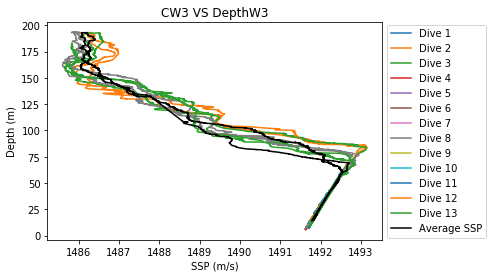

[1492.519753706626,
 1493.1484691150363,
 1493.145780432441,
 1491.6756974835682,
 1491.648081463558,
 1491.6691398882551,
 1491.6661183085064,
 1492.9524013832058,
 1491.860935658839,
 1491.8079821136341,
 1491.7800146523693,
 1491.7310350919818,
 1492.8278299131475]

In [246]:
y1 = DepthW3.values #my depth values
x1 = CW3.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+.8:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW3 VS DepthW3')
plt.show()

maxssp1 #gives max ssp value for this set of data

SUMMER DATA (24 Hours)

In [0]:
url4='https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%20profiler%202.csv'
data4 = pd.read_csv(url4)

In [0]:
#my variables
TempW4 = data4['seawater_temperature'] # temperature


SalinityW4 = data4['practical_salinity'] #salinity 

PressureW4 = data4['seawater_pressure'] # pressure in pascals
DensityW4 = data4['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW4 = PressureW4*10000 / (DensityW4*gravity) #depth of water 

CW4 = 1449.2 +4.6*(TempW4)-0.055*(TempW4**2)+0.00029*(TempW4**3)+(1.34-0.01*(TempW4))*(SalinityW4-35)+0.016*(DepthW4) #speed of sound


In [0]:
#CW4Avg = statistics.mean(CW4) #this gives the average of the speed of sound for this data set.

#x4= DepthW4
#y4= CW4

#plt.plot(x4, y4, label='CW4')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW4 vs DepthW4 of 24 Hours of CTD Data')
#plt.axhline(CW4Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()

#plot shows 1 dive...


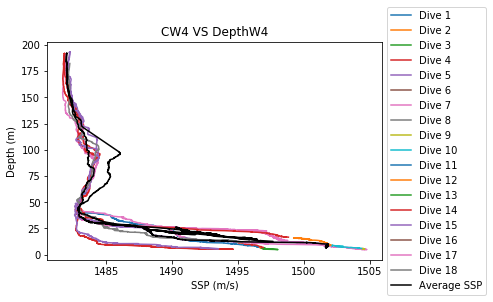

[1496.7302460250025,
 1496.898726245692,
 1498.0476252419908,
 1496.933209355085,
 1494.9896826515055,
 1490.9809862506725,
 1504.7973337379158,
 1504.5233097222356,
 1504.6275470709845,
 1504.3884753855393,
 1502.124391026491,
 1502.0630057389553,
 1499.0149821951898,
 1498.8399266404008,
 1501.8824698855979,
 1501.624978979153,
 1501.5812442693061,
 1495.330769845185]

In [249]:
y1 = DepthW4.values #my depth values
x1 = CW4.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+.34:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW4 VS DepthW4')
plt.show()

maxssp1 #gives max ssp value for this set of data

# 3 Oregon Offshore Cabled Deep Profiler Mooring

WINTER DATA (24 Hour)

In [0]:
url5 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%20profiler%203.csv'
data5 = pd.read_csv(url5)

In [0]:
#my variables
TempW5 = data5['temp'] # temperature


SalinityW5 = data5['practical_salinity'] #salinity 

PressureW5 = data5['pressure'] # pressure in pascals
DensityW5 = data5['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW5 = PressureW5*10000 / (DensityW5*gravity) #depth of water 

CW5 = 1449.2 +4.6*(TempW5)-0.055*(TempW5**2)+0.00029*(TempW5**3)+(1.34-0.01*(TempW5))*(SalinityW5-35)+0.016*(DepthW5) #speed of sound


In [0]:
#CW5Avg = statistics.mean(CW5) #this gives the average of the speed of sound for this data set.

#x5= DepthW5
#y5= CW5

#plt.plot(x5, y5, label='CW5')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW5 vs DepthW5 of 24 Hours of CTD Data')
#plt.axhline(CW5Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()




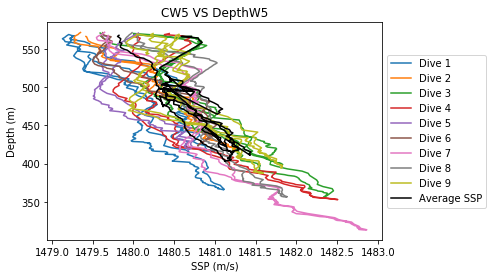

[1481.113338190164,
 1481.257190133518,
 1482.4546475630918,
 1482.5074702962334,
 1480.7377790447822,
 1481.0242480061945,
 1482.8632788007403,
 1481.8880236903497,
 1481.8286067257486]

In [252]:
y1 = DepthW5.values #my depth values
x1 = CW5.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 3.5:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW5 VS DepthW5')
plt.show()

maxssp1 #gives max ssp value for this set of data

SUMMER DATA (24 Hour)

In [0]:
url6='https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%20profiler%203.csv'
data6 = pd.read_csv(url6)

In [0]:
#my variables
TempW6 = data6['temp'] # temperature


SalinityW6 = data6['practical_salinity'] #salinity 

PressureW6 = data6['pressure'] # pressure in pascals
DensityW6 = data6['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW6 = PressureW6*10000 / (DensityW6*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW6 = 1449.2 +4.6*(TempW6)-0.055*(TempW6**2)+0.00029*(TempW6**3)+(1.34-0.01*(TempW6))*(SalinityW6-35)+0.016*(DepthW6) #speed of sound


In [0]:
#CW6Avg = statistics.mean(CW6) #this gives the average of the speed of sound for this data set.

#x6= DepthW6
#y6= CW6

#plt.plot(x6, y6, label='CW6')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW6 vs DepthW6 of 24 Hours of CTD Data')
#plt.axhline(CW6Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()

#plot shows # of dives


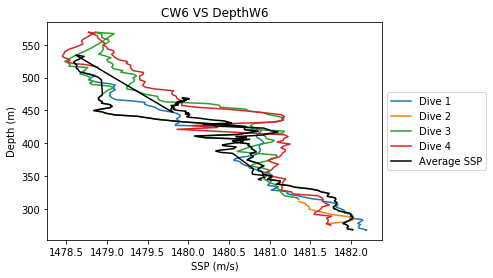

[1482.1912033342164, 1482.0412022612456, 1482.0238601991211, 1481.75917336291]

In [255]:
y1 = DepthW6.values #my depth values
x1 = CW6.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 3.2:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW6 VS DepthW6')
plt.show()

maxssp1 #gives max ssp value for this set of data

# 4 Oregon Slope Base Shallow Profiler

WINTER DATA (24 Hour)

In [0]:
url7 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%20profiler%204.csv'
data7 = pd.read_csv(url7)

In [0]:
#my variables
TempW7 = data7['seawater_temperature'] # temperature


SalinityW7 = data7['practical_salinity'] #salinity 

PressureW7 = data7['seawater_pressure'] # pressure in pascals
DensityW7 = data7['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW7 = PressureW7*10000 / (DensityW7*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW7 = 1449.2 +4.6*(TempW7)-0.055*(TempW7**2)+0.00029*(TempW7**3)+(1.34-0.01*(TempW7))*(SalinityW7-35)+0.016*(DepthW7) #speed of sound


In [0]:
#CW7Avg = statistics.mean(CW7) #this gives the average of the speed of sound for this data set.

#x7= DepthW7
#y7= CW7

#plt.plot(x7, y7, label='CW7')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW7 vs DepthW7 of 24 Hours of CTD Data')
#plt.axhline(CW7Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()

#plot shows # of dives


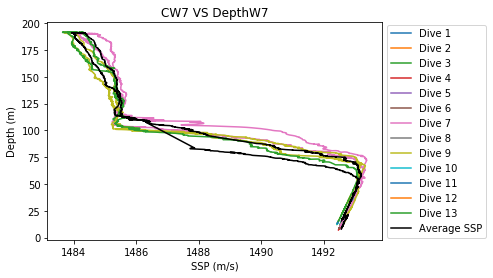

[1493.2403819525093,
 1492.542469766827,
 1492.5863861297619,
 1492.551949419423,
 1492.4836408781225,
 1492.5329623237592,
 1493.380212403213,
 1492.575711190309,
 1493.3339219682337,
 1492.457628767631,
 1492.4809844083018,
 1492.4501493242951,
 1493.1033760733226]

In [258]:
y1 = DepthW7.values #my depth values
x1 = CW7.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 0.78:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW7 VS DepthW7')
plt.show()

maxssp1 #gives max ssp value for this set of data

SUMMER DATA (24 Hour)

In [0]:
url8 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%20profiler%204.csv'
data8 = pd.read_csv(url8)

In [0]:
#my variables
TempW8 = data8['seawater_temperature'] # temperature


SalinityW8 = data8['practical_salinity'] #salinity 

PressureW8 = data8['seawater_pressure'] # pressure in pascals
DensityW8 = data8['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW8 = PressureW8*10000 / (DensityW8*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW8 = 1449.2 +4.6*(TempW8)-0.055*(TempW8**2)+0.00029*(TempW8**3)+(1.34-0.01*(TempW8))*(SalinityW8-35)+0.016*(DepthW8) #speed of sound


In [0]:
#CW8Avg = statistics.mean(CW8) #this gives the average of the speed of sound for this data set.

#x8= DepthW8
#y8= CW8

#plt.plot(x8, y8, label='CW8')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW8 vs DepthW8 of 24 Hours of CTD Data')
#plt.axhline(CW8Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()

#plot shows # of dives


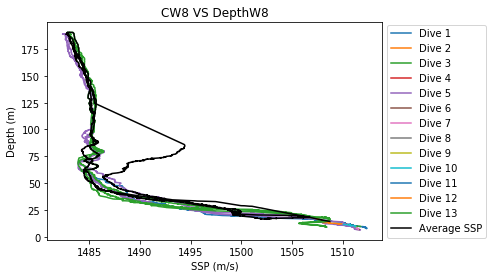

[1512.350756231371,
 1511.9328973916256,
 1511.7281945948248,
 1510.3238593383585,
 1511.7131132452885,
 1511.5636604269732,
 1511.5003121473158,
 1511.2385096885712,
 1511.2465089786047,
 1511.2235281633791,
 1509.9797252492087,
 1509.8626021127805,
 1508.7221349305644]

In [261]:
y1 = DepthW8.values #my depth values
x1 = CW8.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 0.229:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black') #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW8 VS DepthW8')
plt.show()

maxssp1 #gives max ssp value for this set of data

# 5 Oregon Slope Base Deep Profiler

WINTER DATA (24 Hours)

In [0]:
url9 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%20profiler%205.csv'
data9 = pd.read_csv(url9)



In [0]:
#my variables
TempW9 = data9['temp'] # temperature


SalinityW9 = data9['practical_salinity'] #salinity 

PressureW9 = data9['pressure'] # pressure in pascals
DensityW9 = data9['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW9 = PressureW9*10000 / (DensityW9*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW9 = 1449.2 +4.6*(TempW9)-0.055*(TempW9**2)+0.00029*(TempW9**3)+(1.34-0.01*(TempW9))*(SalinityW9-35)+0.016*(DepthW9) #speed of sound


In [0]:
#CW9Avg = statistics.mean(CW9) #this gives the average of the speed of sound for this data set.

#x9= DepthW9
#y9= CW9

#plt.plot(x9, y9, label='CW9')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW9 vs DepthW6 of 24 Hours of CTD Data')
#plt.axhline(CW9Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()
#plot shows # of dives


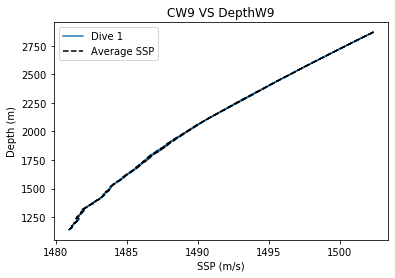

[1502.3629347109074]

In [264]:
y1 = DepthW9.values #my depth values
x1 = CW9.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 5:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black', linestyle = "--") #plotting the average values
plt.legend()
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW9 VS DepthW9')
plt.show()

maxssp1 #gives max ssp value for this set of data

SUMMER DATA (24 Hours)

In [0]:
url10 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%20profiler%205.csv'
data10 = pd.read_csv(url10)

In [0]:
#my variables
TempW10 = data10['temp'] # temperature


SalinityW10 = data10['practical_salinity'] #salinity 

PressureW10 = data10['pressure'] # pressure in pascals
DensityW10 = data10['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW10 = PressureW10*10000 / (DensityW10*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW10 = 1449.2 +4.6*(TempW10)-0.055*(TempW10**2)+0.00029*(TempW10**3)+(1.34-0.01*(TempW10))*(SalinityW10-35)+0.016*(DepthW10) #speed of sound


In [0]:
#CW10Avg = statistics.mean(CW10) #this gives the average of the speed of sound for this data set.

#x10= DepthW10
#y10= CW10

#plt.plot(x10, y10, label='CW10')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW10 vs DepthW10 of 24 Hours of CTD Data')
#plt.axhline(CW10Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()
#plot shows # of dives


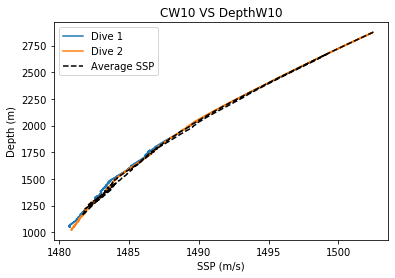

[1502.4838545661696, 1502.4718601001812]

In [267]:
y1 = DepthW10.values #my depth values
x1 = CW10.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ 5:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black', linestyle = "--") #plotting the average values
plt.legend()
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW10 VS DepthW10')
plt.show()

maxssp1 #gives max ssp value for this set of data

# 6 Axial Base  Shallow Profiler

WINTER DATA (24 Hour)

In [0]:
url11 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%20profiler%206.csv'
data11 = pd.read_csv(url11)

In [0]:
#my variables
TempW11 = data11['seawater_temperature'] # temperature


SalinityW11 = data11['practical_salinity'] #salinity 

PressureW11 = data11['seawater_pressure'] # pressure in pascals
DensityW11 = data11['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW11 = PressureW11*10000 / (DensityW11*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW11 = 1449.2 +4.6*(TempW11)-0.055*(TempW11**2)+0.00029*(TempW11**3)+(1.34-0.01*(TempW11))*(SalinityW11-35)+0.016*(DepthW11) #speed of sound


In [0]:
#CW11Avg = statistics.mean(CW11) #this gives the average of the speed of sound for this data set.

#x11= DepthW11
#y11= CW11

#plt.plot(x11, y11, label='CW11')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW11 vs DepthW10 of 24 Hours of CTD Data')
#plt.axhline(CW11Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()
#plot shows # of dives


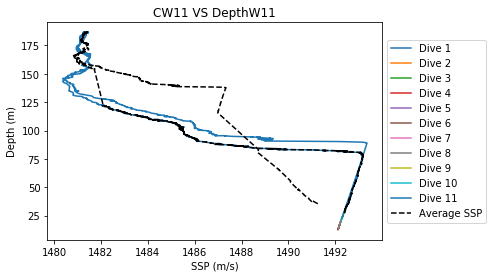

[1493.1966345074486,
 1492.415047500168,
 1492.4294329366287,
 1492.2254241138305,
 1492.16955516706,
 1492.1580842503324,
 1492.1497575147073,
 1492.2619976602816,
 1492.2606782411365,
 1492.2826170180717,
 1493.348381067133]

In [270]:
y1 = DepthW11.values #my depth values
x1 = CW11.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ .58:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black', linestyle = "--") #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW11 VS DepthW11')
plt.show()

maxssp1 #gives max ssp value for this set of data

SUMMER DATA (24 Hour)

In [0]:
url12 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%20profiler%206.csv'
data12 = pd.read_csv(url12)

In [0]:
#my variables
TempW12 = data12['seawater_temperature'] # temperature


SalinityW12 = data12['practical_salinity'] #salinity 

PressureW12 = data12['seawater_pressure'] # pressure in pascals
DensityW12 = data12['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW12 = PressureW12*10000 / (DensityW12*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW12 = 1449.2 +4.6*(TempW12)-0.055*(TempW12**2)+0.00029*(TempW12**3)+(1.34-0.01*(TempW12))*(SalinityW12-35)+0.016*(DepthW12) #speed of sound


In [0]:
#CW12Avg = statistics.mean(CW12) #this gives the average of the speed of sound for this data set.

#x12= DepthW12
#y12= CW12

#plt.plot(x12, y12, label='CW12')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW12 vs DepthW12 of 24 Hours of CTD Data')
#plt.axhline(CW12Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()
#plot shows # of dives


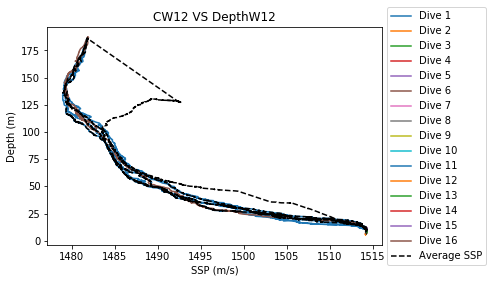

[1514.2210540170506,
 1514.184658483104,
 1514.1560814240027,
 1514.1885695371486,
 1514.1941049065927,
 1514.200694432054,
 1514.1933274422656,
 1514.1938694707042,
 1514.2093127340231,
 1514.0108641499849,
 1514.303550581572,
 1514.2603075578,
 1514.2929128935762,
 1514.2932424694034,
 1514.2950871084386,
 1514.2554631649043]

In [273]:
y1 = DepthW12.values #my depth values
x1 = CW12.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ .28:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black', linestyle = "--") #plotting the average values
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW12 VS DepthW12')
plt.show()

maxssp1 #gives max ssp value for this set of data

# 7 Axial Base Deep Profiler

WINTER DATA (24 Hour)

In [0]:
url13 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/winter%20data%20profiler%207.csv'
data13 = pd.read_csv(url13)

In [0]:
#my variables
TempW13 = data13['temp'] # temperature


SalinityW13 = data13['practical_salinity'] #salinity 

PressureW13 = data13['pressure'] # pressure in pascals
DensityW13 = data13['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW13 = PressureW13*10000 / (DensityW13*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW13 = 1449.2 +4.6*(TempW13)-0.055*(TempW13**2)+0.00029*(TempW13**3)+(1.34-0.01*(TempW13))*(SalinityW13-35)+0.016*(DepthW13) #speed of sound


In [0]:
#CW13Avg = statistics.mean(CW13) #this gives the average of the speed of sound for this data set.

#x13= DepthW13
#y13= CW13

#plt.plot(x13, y13, label='CW13')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW13 vs DepthW13 of 24 Hours of CTD Data')
#plt.axhline(CW13Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()
#plot shows # of dives


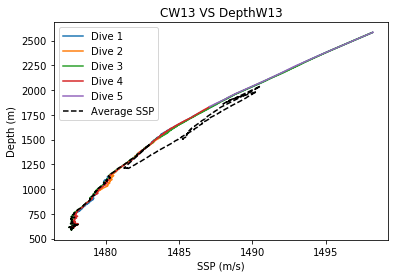

[1498.1866834621067,
 1483.692230804175,
 1498.224224273926,
 1487.0623113466436,
 1498.2376928213139]

In [276]:
y1 = DepthW13.values #my depth values
x1 = CW13.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ .34:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black', linestyle = "--") #plotting the average values
plt.legend()
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW13 VS DepthW13')
plt.show()

maxssp1 #gives max ssp value for this set of data

SUMMER DATA (24 Hour)

In [0]:
url14 = 'https://raw.githubusercontent.com/jakep3/jakep3/master/summer%20data%20profiler%207.csv'
data14 = pd.read_csv(url14)

In [0]:
#my variables
TempW14 = data14['temp'] # temperature


SalinityW14 = data14['practical_salinity'] #salinity 

PressureW14 = data14['pressure'] # pressure in pascals
DensityW14 = data14['density'] #density
gravity=9.81 #gravitational acceleration


#calculations
DepthW14 = PressureW14*10000 / (DensityW14*gravity) #depth of water. multiply by 10000 if the given pressure is in dbar to convert to pascals

CW14 = 1449.2 +4.6*(TempW14)-0.055*(TempW14**2)+0.00029*(TempW14**3)+(1.34-0.01*(TempW14))*(SalinityW14-35)+0.016*(DepthW14) #speed of sound


In [0]:
#CW14Avg = statistics.mean(CW14) #this gives the average of the speed of sound for this data set.

#x14= DepthW14
#y14= CW14

#plt.scatter(x14, y14, label='CW14')
#plt.xlabel('depth (m)')
#plt.ylabel('ssp (m/s)')
#plt.title('CW14 vs DepthW14 of 24 Hours of CTD Data')
#plt.axhline(CW14Avg, color = 'r', linestyle='--', label='SSP Avg') #plots the average SSP value as a horizontal line. 
#plt.legend()
#plt.show()
#plot shows # of dives


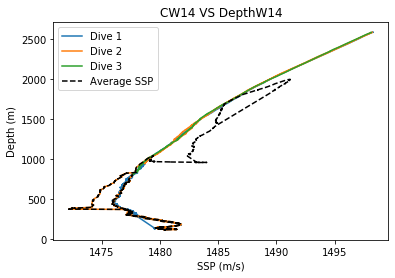

[1498.2957780097622, 1498.2478171325058, 1498.1463252787255]

In [279]:
y1 = DepthW14.values #my depth values
x1 = CW14.values #my speed of sound values

dives1 = 1 
array1 = [] #array 

for d1 in range(len(y1)): #make for loop to find when each dive happens
  if d1!=0 and y1[d1] > y1[d1-1]+ .367:
    dives1 += 1
    array1.append(d1) #index each dive
  else:
    continue

dives1 #output number of dives


#need to split data 

splitx1 = np.split(x1,array1) #splits ssp into subarrays
splity1 = np.split(y1,array1) #splits depth into subarrays

maxssp1 = [] # the max ssp values per dive


for a in range(0,dives1):
    maxssp1.append(max(splitx1[a]))


q = 0

avgsspL = [] #avg ssp value stored location (x axis)
avgdepL = [] #avg depth value stored location (y axis)

while q < len(y1):

  x_1 = 0
  y_1 = 0
  u = 0

  for i in range (0,dives1):
    if len(splitx1[i][:]) <= q:

      u += 1

      continue 

    else:

      x_1 += splitx1[i][q] #allows me to add  ssp values of the same index of each dive
      y_1 += splity1[i][q] #allows me to add depth values of the same index of each dive

  if (dives1-u) != 0:

      x_Avg = x_1/(dives1-u) #get avg values of ssp
      y_Avg = y_1/(dives1-u) #get avg values of depth
      avgsspL.append(x_Avg)
      avgdepL.append(y_Avg)

      q += 1

  else:
      break

#now can make the plot

for i in range(0, dives1): #to plot each dive individually 
 plt.plot(splitx1[i], splity1[i], label="Dive %d"%(i+1)) 

plt.plot(avgsspL, avgdepL, label= "Average SSP", color = 'black', linestyle = "--") #plotting the average values
plt.legend()
plt.xlabel('SSP (m/s)')
plt.ylabel('Depth (m)')
plt.title('CW14 VS DepthW14')
plt.show()

maxssp1 #gives max ssp value for this set of data